In [1]:
%matplotlib inline

# Finalizing Model Data

Code for finalizing the model data  
_Author: Jimmy Charité_  
_Email: jimmy.charite@gmail.com_  

# Directory & Packages

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pysentiment
from textstat.textstat import textstat 
from wordcloud import WordCloud
import nltk
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
retval=os.chdir("..")

# Helper Functions

In [4]:
def pd_tab(df,col,sort_by='count',asc=False):
    tab=df[col].value_counts(dropna=False).reset_index(name='count')
    tab.columns=[col,'count']
    tab['percent']=tab['count']/tab['count'].sum()
    tab.sort_values(by=sort_by,inplace=True,ascending=asc)
    return tab

# Upload Data

In [5]:
raw_data=pd.read_pickle('./clean_data/raw_data_post_parse.pkl')
raw_data.head()

Id   ProductId          UserId                    ProfileName  \
0   2  B00813GRG4  A1D87F6ZCVE5NK                         dll pa   
1   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
2   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
3   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
4   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      1  1346976000   
1                     0                       0      5  1350777600   
2                     0                       0      4  1342051200   
3                     0                       0      5  1340150400   
4                     0                       0      5  1336003200   

                                         Summary  \
0                              Not as Advertised   
1                                    Great taffy   
2                                     Nice Taffy   
3  Great!  Just as good as the expensive brands!   
4                         Wonderful, tasty taffy   

                                                Text  \
0  Product arrived labeled as Jumbo Salted Peanut...   
1  Great taffy at a great price.  There was a wid...   
2  I got a wild hair for taffy and ordered this f...   
3  This saltwater taffy had great flavors and was...   
4  This taffy is so good.  It is very soft and ch...   

                         ...                            vec299  num_sents  \
0                        ...                          0.020952          2   
1                        ...                          0.113610          4   
2                        ...                          0.046176          5   
3                        ...                          0.137415          5   
4                        ...                          0.123007          5   

  num_words readability                                     sentiment_dict  \
0        37         8.0  {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'co...   
1        35         1.3  {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...   
2        92         8.6  {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'co...   
3        63         7.7  {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'co...   
4        34         3.8  {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...   

   neg_senti  pos_senti  neu_senti  comp_senti  \
0      0.079      0.068      0.853     -0.1027   
1      0.000      0.448      0.552      0.9468   
2      0.029      0.163      0.809      0.8830   
3      0.034      0.273      0.693      0.9346   
4      0.000      0.480      0.520      0.9487   

                                          text_lemma  
0  product arrive label peanut actually small siz...  
1  great taffy great price wide assortment yummy ...  
2  get wild hair taffy order pound bag taffy enjo...  
3  saltwater taffy great flavor soft chewy candy ...  
4  taffy good soft chewy flavor amazing definitel...  

[5 rows x 326 columns]

### Finalizing Features

In [6]:
raw_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       ...
       'vec299', 'num_sents', 'num_words', 'readability', 'sentiment_dict',
       'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti', 'text_lemma'],
      dtype='object', length=326)

In [7]:
fin_cols=['helpful','num_sents', 'num_words', 'readability',
          'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti',
          'text_lemma']
vec_cols=[s for s in raw_data.columns if s[:3]=='vec']
fin_cols.extend(vec_cols)
fin_cols

['helpful',
 'num_sents',
 'num_words',
 'readability',
 'neg_senti',
 'pos_senti',
 'neu_senti',
 'comp_senti',
 'text_lemma',
 'vec0',
 'vec1',
 'vec2',
 'vec3',
 'vec4',
 'vec5',
 'vec6',
 'vec7',
 'vec8',
 'vec9',
 'vec10',
 'vec11',
 'vec12',
 'vec13',
 'vec14',
 'vec15',
 'vec16',
 'vec17',
 'vec18',
 'vec19',
 'vec20',
 'vec21',
 'vec22',
 'vec23',
 'vec24',
 'vec25',
 'vec26',
 'vec27',
 'vec28',
 'vec29',
 'vec30',
 'vec31',
 'vec32',
 'vec33',
 'vec34',
 'vec35',
 'vec36',
 'vec37',
 'vec38',
 'vec39',
 'vec40',
 'vec41',
 'vec42',
 'vec43',
 'vec44',
 'vec45',
 'vec46',
 'vec47',
 'vec48',
 'vec49',
 'vec50',
 'vec51',
 'vec52',
 'vec53',
 'vec54',
 'vec55',
 'vec56',
 'vec57',
 'vec58',
 'vec59',
 'vec60',
 'vec61',
 'vec62',
 'vec63',
 'vec64',
 'vec65',
 'vec66',
 'vec67',
 'vec68',
 'vec69',
 'vec70',
 'vec71',
 'vec72',
 'vec73',
 'vec74',
 'vec75',
 'vec76',
 'vec77',
 'vec78',
 'vec79',
 'vec80',
 'vec81',
 'vec82',
 'vec83',
 'vec84',
 'vec85',
 'vec86',
 'vec87',
 '

In [8]:
raw_data=raw_data[fin_cols].copy()

In [9]:
raw_data.head()

helpful  num_sents  num_words  readability  neg_senti  pos_senti  \
0      0.0          2         37          8.0      0.079      0.068   
1      0.0          4         35          1.3      0.000      0.448   
2      0.0          5         92          8.6      0.029      0.163   
3      0.0          5         63          7.7      0.034      0.273   
4      0.0          5         34          3.8      0.000      0.480   

   neu_senti  comp_senti                                         text_lemma  \
0      0.853     -0.1027  product arrive label peanut actually small siz...   
1      0.552      0.9468  great taffy great price wide assortment yummy ...   
2      0.809      0.8830  get wild hair taffy order pound bag taffy enjo...   
3      0.693      0.9346  saltwater taffy great flavor soft chewy candy ...   
4      0.520      0.9487  taffy good soft chewy flavor amazing definitel...   

       vec0    ...       vec290    vec291    vec292    vec293    vec294  \
0 -0.019901    ...    -0.178709  0.120293  0.048853 -0.028560  0.024294   
1 -0.076091    ...    -0.125921  0.026862 -0.011833 -0.023788  0.028657   
2 -0.048797    ...    -0.154745  0.004021  0.004185  0.006071 -0.032341   
3 -0.009421    ...    -0.185385  0.038134  0.014824 -0.012089  0.007642   
4 -0.073490    ...    -0.155703  0.041312 -0.121036 -0.063175  0.075995   

     vec295    vec296    vec297    vec298    vec299  
0 -0.051074 -0.082868 -0.058978  0.058156  0.020952  
1 -0.001059 -0.003236 -0.048324 -0.050874  0.113610  
2  0.030001  0.004792 -0.122627 -0.015319  0.046176  
3 -0.013590  0.038388 -0.117533  0.042929  0.137415  
4 -0.005276  0.051416 -0.136569  0.021066  0.123007  

[5 rows x 309 columns]

#### Number of Sentences

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


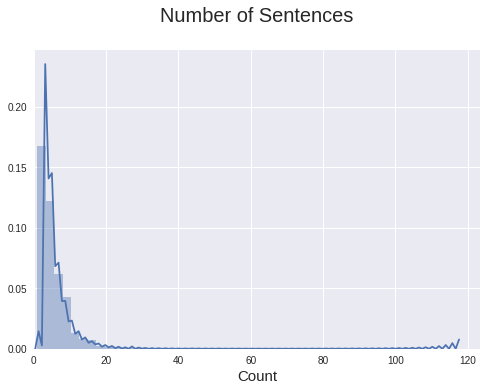

In [10]:
g=sns.distplot(raw_data.num_sents)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


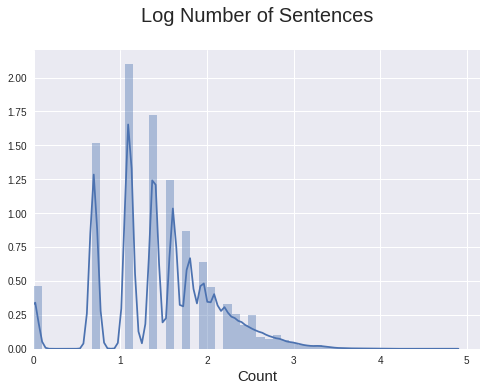

In [11]:
g=sns.distplot(np.log(raw_data.num_sents))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

Will use the log b/c of extreme skewness

In [12]:
raw_data['num_sents']=np.log(raw_data.num_sents)

#### Number of Words

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


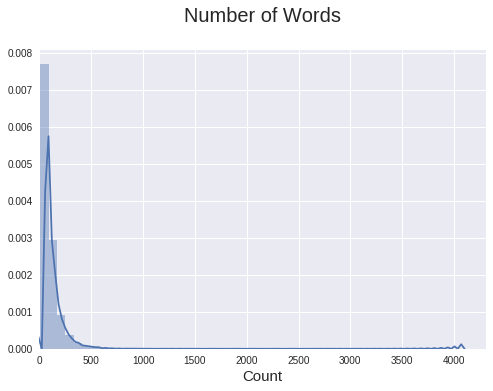

In [13]:
g=sns.distplot(raw_data.num_words)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


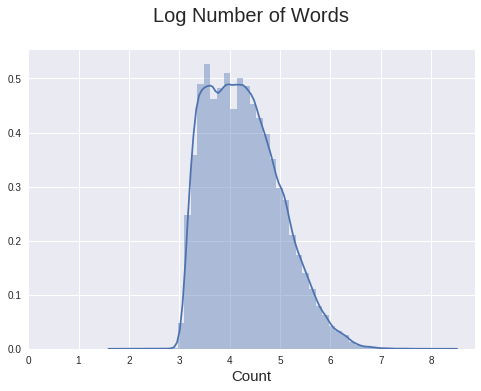

In [14]:
g=sns.distplot(np.log(raw_data.num_words))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [15]:
raw_data['num_words']=np.log(raw_data.num_words)

#### Readability

In [16]:
raw_data.readability.describe()

count    198659.000000
mean          6.398967
std           3.436570
min          -8.400000
25%           4.300000
50%           6.000000
75%           8.000000
max         345.600000
Name: readability, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


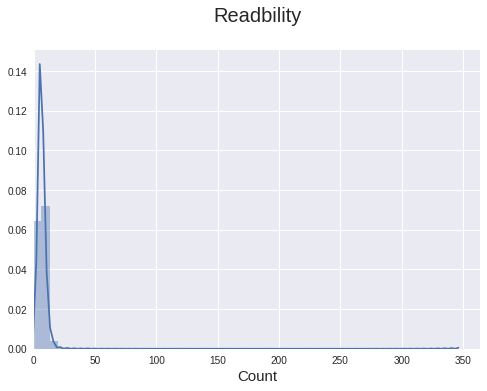

In [17]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [18]:
raw_data.readability.isnull().sum()

0

In retrospect, this seems less appropriate. However, I will just shift it to make it positive, then take the log

In [19]:
raw_data['readability']=np.log(raw_data.readability+100*np.abs(np.min(raw_data.readability)))

In [20]:
raw_data.readability.describe()

count    198659.000000
mean          6.740983
std           0.004010
min           6.723352
25%           6.738508
50%           6.740519
75%           6.742881
max           7.078004
Name: readability, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


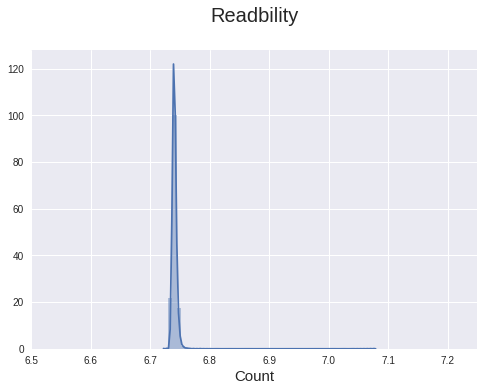

In [21]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(6.5,7.25)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

This comically thin distribution will be adjusted with scaling

#### Sentiment

In [22]:
raw_data.neg_senti.describe()

count    198659.000000
mean          0.043195
std           0.052190
min           0.000000
25%           0.000000
50%           0.030000
75%           0.068000
max           0.602000
Name: neg_senti, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


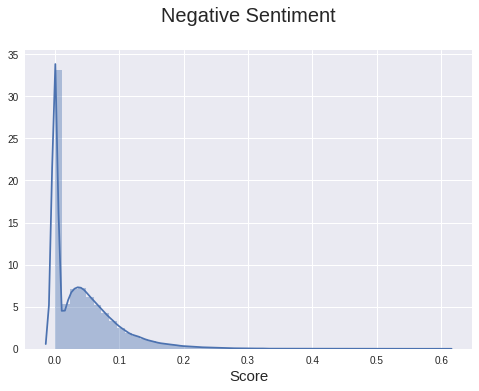

In [23]:
g=sns.distplot(raw_data.neg_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Negative Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [24]:
raw_data.pos_senti.describe()

count    198659.000000
mean          0.191822
std           0.106541
min           0.000000
25%           0.116000
50%           0.178000
75%           0.257000
max           0.964000
Name: pos_senti, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


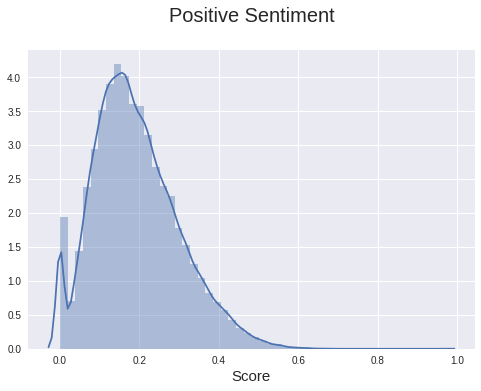

In [25]:
g=sns.distplot(raw_data.pos_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Positive Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [26]:
raw_data.neu_senti.describe()

count    198659.000000
mean          0.764983
std           0.100293
min           0.036000
25%           0.704000
50%           0.775000
75%           0.835000
max           1.000000
Name: neu_senti, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


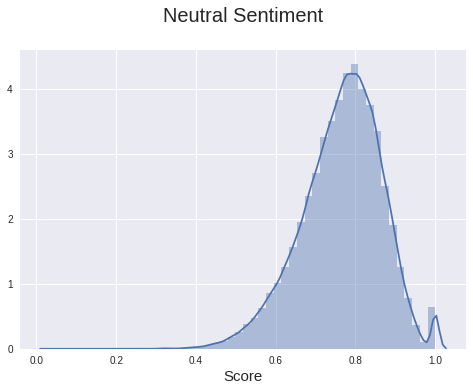

In [27]:
g=sns.distplot(raw_data.neu_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Neutral Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [28]:
raw_data.comp_senti.describe()

count    198659.000000
mean          0.643604
std           0.473956
min          -0.998300
25%           0.573000
50%           0.855500
75%           0.942700
max           0.999800
Name: comp_senti, dtype: float64

/home/jimmy/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


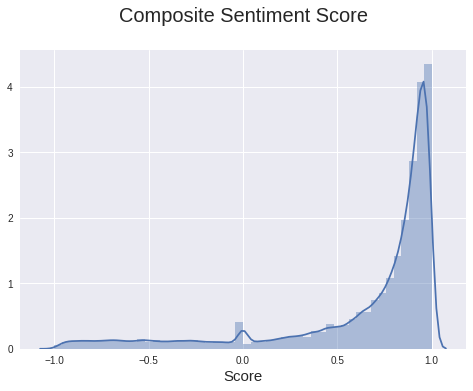

In [29]:
g=sns.distplot(raw_data.comp_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Composite Sentiment Score\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

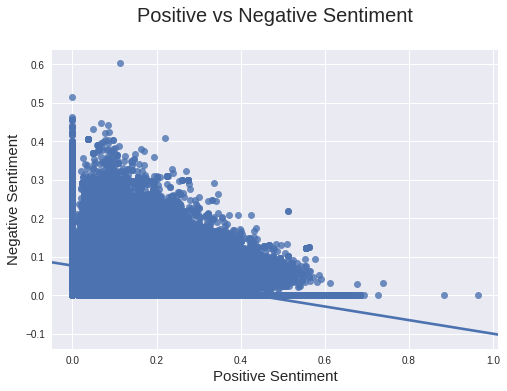

In [30]:
g=sns.regplot(x="pos_senti", y="neg_senti", data=raw_data,
             fit_reg=True)
#g.axes.set_ylim(0,)
#g.axes.set_xlim(0,)
g.axes.set_title('Positive vs Negative Sentiment\n',fontsize=20)
g.set_xlabel('Positive Sentiment',fontsize=15)
g.set_ylabel('Negative Sentiment',fontsize=15)

In [31]:
f='pos_senti ~ neg_senti'
results = smf.ols(formula=f, data=raw_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              pos_senti   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                 2.980e+04
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        22:48:26   Log-Likelihood:             1.7684e+05
No. Observations:              198659   AIC:                        -3.537e+05
Df Residuals:                  198657   BIC:                        -3.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2237      0.000    773.013      0.0

I expected a larger R^2

In [32]:
sns.set(context="paper", font="monospace")

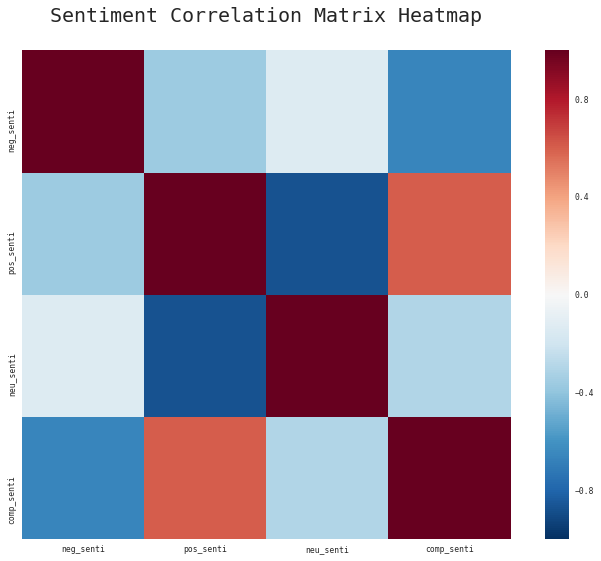

In [33]:
corrmat = raw_data[['neg_senti', 'pos_senti', 'neu_senti', 'comp_senti']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Sentiment Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Sentiment_Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [34]:
corrmat

neg_senti  pos_senti  neu_senti  comp_senti
neg_senti    1.000000  -0.361147  -0.136729   -0.660513
pos_senti   -0.361147   1.000000  -0.874365    0.608528
neu_senti   -0.136729  -0.874365   1.000000   -0.302719
comp_senti  -0.660513   0.608528  -0.302719    1.000000

Ask expected, the sentiments are highly correlated

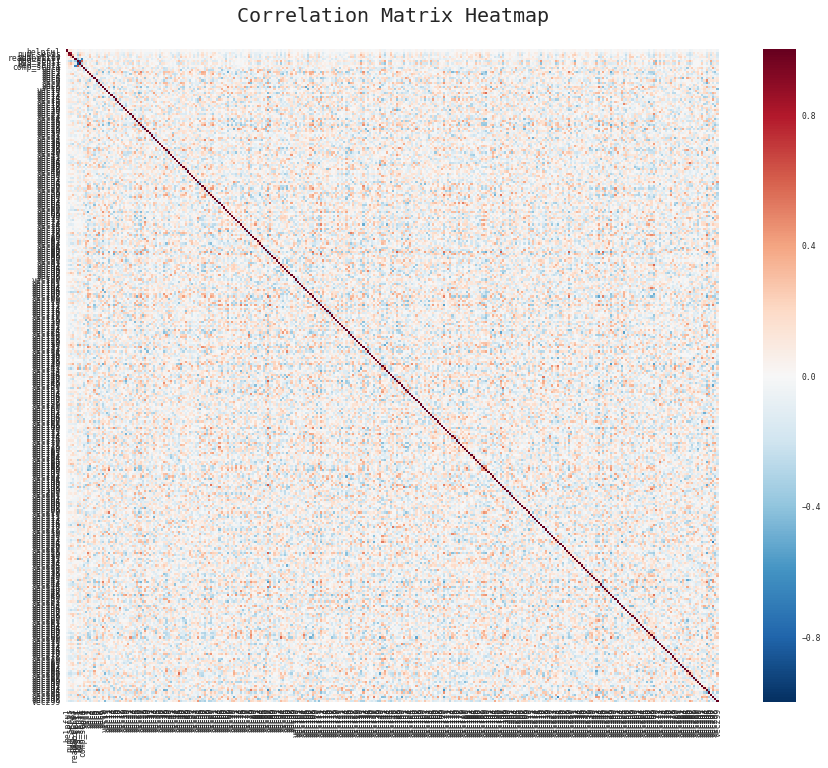

In [35]:
corrmat = raw_data[[s for s in raw_data.columns if s!='text_lemma']].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [36]:
corrmat

helpful  num_sents  num_words  readability  neg_senti  \
helpful      1.000000   0.101176   0.117021     0.045834   0.012478   
num_sents    0.101176   1.000000   0.852068    -0.030509   0.076832   
num_words    0.117021   0.852068   1.000000     0.313085   0.073248   
readability  0.045834  -0.030509   0.313085     1.000000   0.022891   
neg_senti    0.012478   0.076832   0.073248     0.022891   1.000000   
pos_senti   -0.047061  -0.219416  -0.339856    -0.157609  -0.361147   
neu_senti    0.043529   0.193097   0.322906     0.155496  -0.136729   
comp_senti   0.014837   0.127060   0.121910     0.006546  -0.660513   
vec0        -0.021024   0.080847   0.093157    -0.040833  -0.066167   
vec1        -0.000308  -0.023221  -0.023474    -0.082752  -0.015326   
vec2        -0.001800  -0.040844  -0.083776     0.038187  -0.102236   
vec3         0.037009   0.048317   0.219438     0.266689  -0.059989   
vec4        -0.027483  -0.030523  -0.014919    -0.039737  -0.176090   
vec5         0.005861   0.034797   0.026264     0.086985  -0.002146   
vec6        -0.028466  -0.080706  -0.159235    -0.119074   0.069101   
vec7         0.015983   0.040698   0.111544     0.237758  -0.053963   
vec8        -0.008543  -0.053366  -0.042866    -0.068535  -0.083356   
vec9        -0.024680  -0.030126   0.001294    -0.138502   0.083311   
vec10        0.022359   0.075521   0.146375     0.249865   0.110868   
vec11        0.013360   0.024754  -0.148576    -0.218639  -0.085405   
vec12        0.016946   0.129597   0.132072    -0.030925   0.092374   
vec13        0.002316  -0.033118  -0.074886     0.002575   0.008436   
vec14       -0.004829  -0.034882  -0.047273     0.092256  -0.097265   
vec15        0.026936   0.082896   0.078156    -0.055285  -0.015697   
vec16        0.042710   0.117887   0.106741     0.109839   0.090225   
vec17        0.009666  -0.048920  -0.077814    -0.095418  -0.122056   
vec18       -0.031889  -0.076767  -0.112490     0.017747   0.033408   
vec19       -0.017722  -0.114135  -0.169977    -0.116136   0.060587   
vec20        0.010571   0.053664   0.052573    -0.097521   0.119144   
vec21        0.028727   0.132612   0.183525     0.123579   0.049268   
...               ...        ...        ...          ...        ...   
vec270       0.046687   0.113716   0.212135     0.035422   0.134830   
vec271      -0.010712  -0.036333  -0.114920    -0.039947   0.015466   
vec272       0.017403   0.150534   0.196077     0.200743   0.094152   
vec273       0.031521   0.010851   0.072408     0.060361  -0.038523   
vec274       0.021748   0.058078   0.176714     0.093189   0.047291   
vec275      -0.052947  -0.078521  -0.149816    -0.199782  -0.007388   
vec276      -0.024138  -0.046860  -0.151765    -0.070463  -0.039156   
vec277       0.016283  -0.045008   0.004159     0.120040  -0.092154   
vec278      -0.039918  -0.114212  -0.129923    -0.072647  -0.132023   
vec279      -0.036219  -0.097571  -0.139562    -0.136086  -0.030958   
vec280      -0.004194   0.103293   0.057103    -0.067578   0.001907   
vec281       0.043319   0.004465   0.170179     0.211801   0.005537   
vec282       0.012622   0.075245   0.116539     0.223578   0.100512   
vec283      -0.004048  -0.041612   0.029245     0.027726  -0.013222   
vec284       0.023236  -0.035544   0.038400     0.163045  -0.093831   
vec285       0.004928  -0.095984  -0.175659    -0.046647  -0.018414   
vec286      -0.059088  -0.217704  -0.220235    -0.135602  -0.149810   
vec287      -0.042835  -0.116410  -0.168371    -0.051483  -0.023383   
vec288       0.008528   0.128002   0.073882    -0.052030   0.079790   
vec289      -0.012864  -0.011573  -0.063629    -0.080055  -0.032587   
vec290      -0.006312   0.096276   0.025480    -0.086714   0.017673   
vec291      -0.016650   0.030849   0.066575     0.102816   0.040843   
vec292       0.010745   0.041608   0.140240     0.108107  -0.028029   
vec293       0.003621  -0.014270  -0.035748     0.099261  -0.016988   
vec294      -0.041179  -0.136374  -0.1

In [37]:
raw_data=raw_data[fin_cols].copy()

In [38]:
raw_data.head()

helpful  num_sents  num_words  readability  neg_senti  pos_senti  \
0      0.0   0.693147   3.610918     6.742881      0.079      0.068   
1      0.0   1.386294   3.555348     6.734948      0.000      0.448   
2      0.0   1.609438   4.521789     6.743588      0.029      0.163   
3      0.0   1.609438   4.143135     6.742527      0.034      0.273   
4      0.0   1.609438   3.526361     6.737915      0.000      0.480   

   neu_senti  comp_senti                                         text_lemma  \
0      0.853     -0.1027  product arrive label peanut actually small siz...   
1      0.552      0.9468  great taffy great price wide assortment yummy ...   
2      0.809      0.8830  get wild hair taffy order pound bag taffy enjo...   
3      0.693      0.9346  saltwater taffy great flavor soft chewy candy ...   
4      0.520      0.9487  taffy good soft chewy flavor amazing definitel...   

       vec0    ...       vec290    vec291    vec292    vec293    vec294  \
0 -0.019901    ...    -0.178709  0.120293  0.048853 -0.028560  0.024294   
1 -0.076091    ...    -0.125921  0.026862 -0.011833 -0.023788  0.028657   
2 -0.048797    ...    -0.154745  0.004021  0.004185  0.006071 -0.032341   
3 -0.009421    ...    -0.185385  0.038134  0.014824 -0.012089  0.007642   
4 -0.073490    ...    -0.155703  0.041312 -0.121036 -0.063175  0.075995   

     vec295    vec296    vec297    vec298    vec299  
0 -0.051074 -0.082868 -0.058978  0.058156  0.020952  
1 -0.001059 -0.003236 -0.048324 -0.050874  0.113610  
2  0.030001  0.004792 -0.122627 -0.015319  0.046176  
3 -0.013590  0.038388 -0.117533  0.042929  0.137415  
4 -0.005276  0.051416 -0.136569  0.021066  0.123007  

[5 rows x 309 columns]

In [39]:
raw_data.to_pickle('./clean_data/clean_data.pkl')